<h1 align="center">Laboratorio de Estadística Computacional <br>con Python</h1>
<img src="https://raw.githubusercontent.com/sborquez/Python-LEC/master/resources/main-image-python.png" width="60%">
    
<h2 align="center">Tema 1: Análisis Exploratorio </h2>

<h6 align="center">Notebook creado por Sebastián Bórquez G. - <a href="mailto://sebastian.borquez.g@gmail.com" >sebastian.borquez.g@gmail.com</a> - DI UTFSM - Abril 2020.</h6> 

# Tabla de Contenido

* [Antes de Comenzar](#requisitos)

* [Análisis Exploratorio de Datos](#1.1)
    * [¿Por qué es importante?](#1.1.1)
    * [Manipulación de datos con Pandas](#1.1.2)
    * [¿Qué Gráfico debería usar?](#1.1.3)

* [Caso de estudio: Migraciones en Chile](#1.2)
    * [Carga de Datos](#1.2.1)
    * [Conociendo el Dataframe](#1.2.2)
    * [Realizar Consultas](#1.2.3)
    * [Operaciones sobre el DataFrame](#1.2.4)
    * [Agrupar datos](#1.2.5)
    * [Visualizaciones Básicas](#1.2.6)

* [Caso de estudio: Pokemon Dataset](#1.3)
    * [Estadísticas Básicas](#1.3.1)
    * [Operaciones y Comparaciones entre Columnas](#1.3.2)
    * [Visualización Estadística de Datos](#1.3.3)
    
* [Caso de estudio: SARS-CoV-2 Total Cases Dataset](#1.4)
    Pronto...
    * [How to combine data from multiple tables?](#1.4.1)
    * [How to handle time series data with ease?](#1.4.2)
    * [Log Scales](#1.4.3)
    * [Gráficos Interactivos con Plotly](#1.4.4)


<div id="requisitos"></div>

# Antes de Comenzar

Para tener un primer acercamiento a la **sintaxis** usada en **Pandas** y sus objetos **DataFrame** y **Series** recomiendo enormemente inicar con:

<br>
<center>
    <a href="https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html"><h1>10 Minutes to Panda</h1></a>
</center>

Puede serguir con el resto de las secciones solo al menos entiendes los conceptos: 
* ¿Qué es un `pd.DataFrame` y un `pd.Series`?
* Sabes como utilizar `iloc, loc, at` y sus derivados.
* Entiendes como manejar datos perdidos (**missing data**)
* Operaciones disponibles como: `str` methods, stats methods.
* ¿Qué es un `Time Series`?
* ¿Qué es un `Categorical`?

<div id="1.1"></div>

# Análisis Exploratorio de Datos

<img src="https://www.aiche.org/sites/default/files/images/webinar/shutterstock357106388.jpg" width="60%"></img>

<div id="1.1.1"></div>

## ¿Por qué es importante?

**Análisis exploratorio y visualizacion** de datos son dos pilares fundamentales del toobox de un **data scientist**.

A través de la exploraración de los datos y su visualización podemos descubrir siertos patrones, comportamientos o anomalías en nuestros datos. De esta forma podemos llegar **formular mejores hipotesis**.

Un análisis exploratiorio queremos **descubir que historia nos quieren contar los datos**.

<div id="1.1.2"></div>

## Manipulación de datos con Pandas

[Pandas](http://pandas.pydata.org/) (panel data) es un módulo de Python que nos provee de estructuras de datos, alto desempeño y herramientas para el análisis de datos.

Por lo general, como data scientist trabajaremos con datos en forma de tablas, estos por lo general se encuentran almacenados en formatos csv, xlsx, tsv, entre otros. Pandas nos ofrece una manera conveniente para cargar, procesar, analizar y guardar dichas tablas.

$\gamma$ _Cada vez que te inicias en una nueva herramienta recomiendo el uso de **cheat sheets** para ir aprendiendo sus comandos:_

* [Pandas Official Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
* [Pandas DataCamp 1](https://datacamp-community-prod.s3.amazonaws.com/fbc502d0-46b2-4e1b-b6b0-5402ff273251)
* [Pandas DataCamp 2](https://datacamp-community-prod.s3.amazonaws.com/9f0f2ae1-8bd8-4302-a67b-e17f3059d9e8)


In [1]:
import pandas as pd
pd.__version__

'1.0.3'

<div id="1.1.3"></div>

## ¿Qué gráfico usar?


Buenas prácticas y consejos.

Proximamente.



<div id="1.2"></div>

# Caso de estudio: Migraciones en Chile

<img src="https://www.extranjeria.gob.cl/media/2016/03/logo-migraciones-sin-fondo-1.png" width=40% height=35%>


El caso de estudio que abarca esta sesión consiste en la exploración de datos de **inmigración en Chile** durante el año **2018**. El dataset se encuentra disponible en la página de __[Departamento de Extranjería y Migración](https://www.extranjeria.gob.cl/estadisticas-migratorias/)__ del Ministerio del Interior y Seguridad Pública.

__Descarga el datasets desde este [link](https://github.com/sborquez/Python-LEC/blob/master/data/Formato-WEB-PDs-2005-2016.xlsx?raw=true).__


In [2]:
dataset_path = "https://labcomp.cl/~sborquez/datasets/chile/Formato-WEB-PDs-2005-2016.xlsx"

<div id="1.2.1"></div>

## Carga de Datos

El primer paso, cargar el dataset en un `pd.DataFrame` (usaremos el termino `df` para referirnos a una instancia de `pd.DataFrame`). Pandas soporta una variedad de formatos: `.csv`, `.json`, `.xlsx`, entre otros. En este caso, el dataset viene en formato *excel* `.xlsx`. 

La función **`pd.read_excel()`** nos entrega un `DataFrame`, el cual es la representación que utiliza Pandas para una tabla ded datos. La tabla, al igual que en excel, posee tanto los nombres de las columnas, indices y los valores de los datos contenidos en la tabla.

$\gamma$ _Usamo el signo `?` al final de una funcion, clase o método para obtener una ayuda._

In [3]:
pd.read_excel?

In [4]:
# En caso de algun Import Error ejecutar la linea siguiente.
#!conda install -y xlrd

In [5]:
visas = pd.read_excel(dataset_path)
type(visas)

pandas.core.frame.DataFrame

<div id="1.2.2"></div>

## Conociendo el DataFrame

Antes de comenzar a hacer consultas, visualizaciones, análisis, etc. Es escencial tener una idea de que contiene el `DataFrame`.

### Información Básica

Podemos obtener información de la estructura del `DataFrame`, sus dimensiones, las columnas, y una muestra de los datos.

In [6]:
visas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324932 entries, 0 to 324931
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   SEXO        324932 non-null  object        
 1   NACIMIENTO  324931 non-null  datetime64[ns]
 2   ACTIVIDAD   324932 non-null  object        
 3   PROFESION   324932 non-null  object        
 4   PAIS        324932 non-null  object        
 5   ESTUDIOS    324932 non-null  object        
 6   COMUNA      324932 non-null  object        
 7   PROVINCIA   324932 non-null  object        
 8   REGION      324932 non-null  object        
 9   TIT_DEP     323623 non-null  object        
 10  AÑO         324932 non-null  int64         
 11  BENEFICIO   324932 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 29.7+ MB


In [7]:
# Solo funciona con columnas numericas (int o float)
visas.describe()

,AÑO
count,324932.000000
mean,2011.956988
std,3.314549
min,2005.000000
25%,2009.000000
50%,2013.000000
75%,2015.000000
max,2016.000000


In [8]:
print(f"Cantidad de filas: {len(visas)}")
print(f"Dimensiones: {visas.shape}")
print(f"Cantidad de valores: {visas.size}")

# El simbolo '*' es especial en Python. Junto a un iterable, este se 'desenrolla'. 
# En consecuencia, se le pasan los items del iterable a la funcion print
print("Columnas: ", *visas.columns)

Cantidad de filas: 324932
Dimensiones: (324932, 12)
Cantidad de valores: 3899184
Columnas:  SEXO NACIMIENTO ACTIVIDAD PROFESION PAIS ESTUDIOS COMUNA PROVINCIA REGION TIT_DEP AÑO BENEFICIO


Podemos hacernos una idea del contenido del `DataFrame` utilizando los métodos **`df.head(n)`** y **`df.tail(n)`**. Tal como sus nombres lo indican, muestran los **`n`** primeros o **`n`** últimas filas del `DataFrame`.

In [9]:
visas.head(5)

,SEXO,NACIMIENTO,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,TIT_DEP,AÑO,BENEFICIO
0,Femenino,1974-10-05,EMPLEADO,MATRONA,PERÚ,no indica,SANTIAGO,SANTIAGO,METROPOLITANA,T,2006,PERMANENCIA DEFINITIVA
1,Masculino,1949-09-13,EMPLEADO,INGENIERO,ECUADOR,no indica,PROVIDENCIA,SANTIAGO,METROPOLITANA,T,2007,PERMANENCIA DEFINITIVA
2,Femenino,1949-12-07,EMPLEADO,ASESORA DEL HOGAR,BOLIVIA,BASICO,ARICA,ARICA,ARICA Y PARINACOTA,T,2007,PERMANENCIA DEFINITIVA
3,Femenino,1966-09-20,DUEÑA DE CASA,DUEÑA DE CASA,BOLIVIA,MEDIO,ARICA,ARICA,ARICA Y PARINACOTA,T,2006,PERMANENCIA DEFINITIVA
4,Masculino,1981-08-15,EMPRESARIO O PATRON,COMERCIANTE,BRASIL,no indica,LAS CONDES,SANTIAGO,METROPOLITANA,T,2008,PERMANENCIA DEFINITIVA


In [10]:
visas.tail(5)

,SEXO,NACIMIENTO,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,TIT_DEP,AÑO,BENEFICIO
324927,Masculino,1986-03-18,INACTIVO,EMPLEADO,ESPAÑA,NO INFORMA,LAS CONDES,SANTIAGO,METROPOLITANA,T,2016,PERMANENCIA DEFINITIVA
324928,Masculino,1977-06-27,NO INFORMA,NO INFORMA,MEXICO,NO INFORMA,LAS CONDES,SANTIAGO,METROPOLITANA,T,2016,PERMANENCIA DEFINITIVA
324929,Masculino,1954-04-07,NO INFORMA,NO INFORMA,CHINA REPUBLICA POPULAR,NO INFORMA,LAMPA,CHACABUCO,METROPOLITANA,T,2016,PERMANENCIA DEFINITIVA
324930,Femenino,1989-05-03,EMPLEADO,ADMINISTRADOR,CHINA REPUBLICA POPULAR,NO INFORMA,TALCA,TALCA,MAULE,T,2016,PERMANENCIA DEFINITIVA
324931,Femenino,1965-03-26,RELIGIOSO,RELIGIOSO,ESPAÑA,TECNICO,QUINTA NORMAL,SANTIAGO,METROPOLITANA,T,2016,PERMANENCIA DEFINITIVA


Otro método es **`df.sample(n)`**, esta vez son filas seleccionadas de forma aleatoria.

In [11]:
visas.sample(5)

,SEXO,NACIMIENTO,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,TIT_DEP,AÑO,BENEFICIO
298216,Masculino,1983-05-26,RELIGIOSO,RELIGIOSO,MEXICO,TECNICO,LOS ANGELES,BIOBIO,BIOBIO,T,2015,PERMANENCIA DEFINITIVA
212365,Masculino,2011-03-13,INACTIVO,MENOR DE EDAD,ALEMANIA,NINGUNO,PUERTO MONTT,LLANQUIHUE,LOS LAGOS,T,2013,PERMANENCIA DEFINITIVA
115469,Femenino,1971-12-03,EMPLEADO DOMESTICO,EMPLEADO,PERÚ,MEDIO,RENCA,SANTIAGO,METROPOLITANA,T,2009,PERMANENCIA DEFINITIVA
293030,Masculino,1980-03-23,EMPLEADO,INGENIERO,EL SALVADOR,no indica,SANTIAGO,SANTIAGO,METROPOLITANA,T,2015,PERMANENCIA DEFINITIVA
263784,Masculino,1998-09-03,ESTUDIANTE,ESTUDIANTE,COLOMBIA,MEDIO,TOCOPILLA,TOCOPILLA,ANTOFAGASTA,D,2015,PERMANENCIA DEFINITIVA


### Valores por columna

A continuación, se hará una exploración de las columnas.

In [12]:
# Al iterar un df, se obtienen los nombres de las columnas
for columna in visas:
    
    # Una forma de acccesos a las columnas es como usarlo como un diccionario
    datos_columna = visas[columna]
    
    # Cantidad de valores unicos
    distintos = datos_columna.nunique()
    
    print(f"La columna {columna} tiene {distintos} valores diferentes.")

La columna SEXO tiene 2 valores diferentes.
La columna NACIMIENTO tiene 27688 valores diferentes.
La columna ACTIVIDAD tiene 15 valores diferentes.
La columna PROFESION tiene 599 valores diferentes.
La columna PAIS tiene 164 valores diferentes.
La columna ESTUDIOS tiene 8 valores diferentes.
La columna COMUNA tiene 351 valores diferentes.
La columna PROVINCIA tiene 55 valores diferentes.
La columna REGION tiene 15 valores diferentes.
La columna TIT_DEP tiene 2 valores diferentes.
La columna AÑO tiene 12 valores diferentes.
La columna BENEFICIO tiene 2 valores diferentes.


### Valores de una Columna: 

¿Cuáles son esos valores diferentes? Para esto, se usa el método `df[<col_name>].unique()`.

In [13]:
columna = "ESTUDIOS"
print(f"Valores distintos de la columna {columna}: {visas[columna].unique()}.")

Valores distintos de la columna ESTUDIOS: ['no indica' 'BASICO' 'MEDIO' 'TECNICO' 'UNIVERSITARIO' 'NO INFORMA'
 'NINGUNO' 'PREBASICO'].


### Cantidad de individuos por cada valor:

Otra pregunta interesante es ¿Cuántas veces aparece cada valor?. Para esto tenemos otro método `df[<col_name>].value_counts()`

In [14]:
# Esta es otra notacion para acceder a las columnas: df.col_name == df["col_name"]
visas.ESTUDIOS.value_counts()

no indica        105585
MEDIO             76010
NO INFORMA        46544
UNIVERSITARIO     35108
BASICO            32790
TECNICO           18482
NINGUNO            7019
PREBASICO          3394
Name: ESTUDIOS, dtype: int64

<div id="1.2.3"></div>

## Realizar Consultas

Pandas nos ofrece una interface sencilla al momento de realizar consultas al conjunto de datos. A quienes ya han trabajado con Bases de Datos ya deben estar familiarizados con `SQL`, la idea es similar al consultar tablas de Pandas. 

Por ejemplo, si queremos solo las filas que cumplen una condición usamos la siguiente sintaxis:

```python
dataframe[<condiciones>]
```

¿Cuáles son las personas de Perú?. Lo podemos interpretar como, ¿Cuáles son las filas donde **el valor "Pais" es igual a "Perú"**?

Esta condición marcada en negrita, se traduce a la sintaxis de Pandas de la siguiente forma:

In [15]:
# Esto nos entre una pd.Series con valores booleanos si se cumple o no la condición para cada fila
(visas["PAIS"] == "PERÚ").head(5)

0     True
1    False
2    False
3    False
4    False
Name: PAIS, dtype: bool

Según la sintaxis anterior, basta colocar esta condición entre corchetes.

In [16]:
visas[visas["PAIS"] == "PERÚ"].head(5)

,SEXO,NACIMIENTO,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,TIT_DEP,AÑO,BENEFICIO
0,Femenino,1974-10-05,EMPLEADO,MATRONA,PERÚ,no indica,SANTIAGO,SANTIAGO,METROPOLITANA,T,2006,PERMANENCIA DEFINITIVA
8,Masculino,1990-08-17,ESTUDIANTE,ESTUDIANTE,PERÚ,no indica,PEÑAFLOR,TALAGANTE,METROPOLITANA,T,2007,PERMANENCIA DEFINITIVA
9,Femenino,1964-04-08,EMPLEADO,CHEF,PERÚ,no indica,OSORNO,OSORNO,LOS LAGOS,T,2007,PERMANENCIA DEFINITIVA
11,Masculino,1961-08-31,EMPLEADO,JARDINERO,PERÚ,no indica,CONCHALI,SANTIAGO,METROPOLITANA,T,2007,PERMANENCIA DEFINITIVA
14,Masculino,1952-01-17,EMPLEADO,MECANICO,PERÚ,MEDIO,POZO ALMONTE,TAMARUGAL,TARAPACA,T,2007,PERMANENCIA DEFINITIVA


O pueden incluir las operaciones lógicas **`AND (&)`**,**`OR (|)`** y **`NOT (~)`** usando varias condiciones como:

In [17]:
visas[(visas["PAIS"] == "PERÚ") & ((visas["COMUNA"] == "VIÑA DEL MAR") | (visas["COMUNA"] == "VALPARAISO"))].head(5)

,SEXO,NACIMIENTO,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,TIT_DEP,AÑO,BENEFICIO
226,Masculino,1985-03-07,EMPLEADO,ARTESANO,PERÚ,no indica,VIÑA DEL MAR,VALPARAISO,VALPARAISO,T,2006,PERMANENCIA DEFINITIVA
1116,Femenino,1940-05-27,JUBILADO O PENSIONADO,EDUCADOR,PERÚ,NO INFORMA,VIÑA DEL MAR,VALPARAISO,VALPARAISO,T,2009,PERMANENCIA DEFINITIVA
2296,Masculino,1965-04-08,EMPLEADO,PUBLICISTA,PERÚ,TECNICO,VALPARAISO,VALPARAISO,VALPARAISO,T,2015,PERMANENCIA DEFINITIVA
2782,Femenino,1974-08-15,EMPLEADO DOMESTICO,ASESORA DEL HOGAR,PERÚ,MEDIO,VIÑA DEL MAR,VALPARAISO,VALPARAISO,T,2016,PERMANENCIA DEFINITIVA
2860,Masculino,1953-09-05,EMPRESARIO O PATRON,EMPRESARIO O PATRON,PERÚ,UNIVERSITARIO,VIÑA DEL MAR,VALPARAISO,VALPARAISO,T,2009,PERMANENCIA DEFINITIVA


Tambien podemos utilizar el método **`isin`** para corroborar con una lista de valores.

In [18]:
# Si una linea de código es muy larga, podemos dividirla en varia lineas usando el simbolo "\"
visas[(visas["ACTIVIDAD"].isin(['ESTUDIANTE'])) & \
      ~(visas["ESTUDIOS"].isin(['PREBASICO','BASICO', 'MEDIO', 'NO INFORMA', 'NINGUNO']))].head(5)

,SEXO,NACIMIENTO,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,TIT_DEP,AÑO,BENEFICIO
8,Masculino,1990-08-17,ESTUDIANTE,ESTUDIANTE,PERÚ,no indica,PEÑAFLOR,TALAGANTE,METROPOLITANA,T,2007,PERMANENCIA DEFINITIVA
12,Masculino,1992-07-13,ESTUDIANTE,ESTUDIANTE,COLOMBIA,no indica,QUINTA NORMAL,SANTIAGO,METROPOLITANA,D,2006,PERMANENCIA DEFINITIVA
28,Masculino,1987-08-19,ESTUDIANTE,ESTUDIANTE,PERÚ,UNIVERSITARIO,PUDAHUEL,SANTIAGO,METROPOLITANA,D,2008,PERMANENCIA DEFINITIVA
38,Femenino,1985-10-03,ESTUDIANTE,ESTUDIANTE,PERÚ,no indica,SANTIAGO,SANTIAGO,METROPOLITANA,T,2006,PERMANENCIA DEFINITIVA
39,Masculino,1988-02-20,ESTUDIANTE,ESTUDIANTE,PERÚ,no indica,SAN MIGUEL,SANTIAGO,METROPOLITANA,T,2008,PERMANENCIA DEFINITIVA


<div id="1.2.4"></div>

## Operaciones sobre DataFrames

No tan solo podemos **acceder** a los valores, podemos **crear** nuevas columnas a partir de las actuales, **modificar** columnas o incluso **eliminar** columnas que no necesitamos.

Por ejemplo, podemos crear una nueva columna que obtenga la _edad de las personas_.

In [19]:
from datetime import datetime

visas["EDAD"] = (datetime.now() - visas["NACIMIENTO"]).transform(lambda x: x.days // 365)
visas.head(5)

,SEXO,NACIMIENTO,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,TIT_DEP,AÑO,BENEFICIO,EDAD
0,Femenino,1974-10-05,EMPLEADO,MATRONA,PERÚ,no indica,SANTIAGO,SANTIAGO,METROPOLITANA,T,2006,PERMANENCIA DEFINITIVA,45.0
1,Masculino,1949-09-13,EMPLEADO,INGENIERO,ECUADOR,no indica,PROVIDENCIA,SANTIAGO,METROPOLITANA,T,2007,PERMANENCIA DEFINITIVA,70.0
2,Femenino,1949-12-07,EMPLEADO,ASESORA DEL HOGAR,BOLIVIA,BASICO,ARICA,ARICA,ARICA Y PARINACOTA,T,2007,PERMANENCIA DEFINITIVA,70.0
3,Femenino,1966-09-20,DUEÑA DE CASA,DUEÑA DE CASA,BOLIVIA,MEDIO,ARICA,ARICA,ARICA Y PARINACOTA,T,2006,PERMANENCIA DEFINITIVA,53.0
4,Masculino,1981-08-15,EMPRESARIO O PATRON,COMERCIANTE,BRASIL,no indica,LAS CONDES,SANTIAGO,METROPOLITANA,T,2008,PERMANENCIA DEFINITIVA,38.0


El código anterior realiza varias cosas en una sola línea, la analizaremos por partes.

Primero, la operación entre **"Escalar" y Series.**

```Python
a = datetime.now() - visas["NACIMIENTO"]
```

Similar a cuando en el **algebra lineal** operamos un escalar con un vector. Debemos aplicar la operación (suma, resta, multiplicación, etc) entre el escalar y cada elemento del `Series`, siendo el resultado un nuevo `Series` de mismo tamaño.

Segundo, **métodos de `Series`**. 

```Python
b = a.transform(lambda x: x.days // 365)
```

Existen varios métodos de `Series` los cuales realizar alguna operación sobre cada elemento de esta. En este caso, `transform` recibe una función, la cuál se aplica a cada elemento. En el ejemplo, esta transforma las fechas, de dias a años.


Tercero, **Asignación de nuevas columnas**

Para crear una nueva columna, al igual que un diccionario, basta con asignarle una nueva "llave" algún valor. En este caso, el nombre de la columna es la "llave", y el "valor" es un `Series` del mismo largo de `DataFrame`.

```Python
visas["EDAD"] = b
```

Otro ejemplo de método de `Series` es `replace`. Esta modifica columnas reemplazando valores, por ejemplo en la lista de **`ESTUDIOS`** tiene valores que son "repetidos" pero tienen diferente nombre. Me refiero a `'no indica'`, `'NO INFORMA'`. Queremos eliminar estos dos valores y dejar solo uno.

In [20]:
visas["ESTUDIOS"].replace("no indica", "NO INFORMA", inplace=True)
visas["ESTUDIOS"].value_counts()

NO INFORMA       152129
MEDIO             76010
UNIVERSITARIO     35108
BASICO            32790
TECNICO           18482
NINGUNO            7019
PREBASICO          3394
Name: ESTUDIOS, dtype: int64

### Eliminar datos del DataFrame

Un comando bastante útil es `drop`. El cuál puede eliminar tanto filas como columnas.

In [21]:
visas.drop?

Se puede dar el caso que algunas columnas sean innecesarias, por ejemplo el `BENEFICIO`, ya que en este caso siempre es 2018. Usamos `drop` para eliminarla

In [22]:
visas.drop(columns=["TIT_DEP", "BENEFICIO"], inplace=True)
visas.head(5)

,SEXO,NACIMIENTO,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,AÑO,EDAD
0,Femenino,1974-10-05,EMPLEADO,MATRONA,PERÚ,NO INFORMA,SANTIAGO,SANTIAGO,METROPOLITANA,2006,45.0
1,Masculino,1949-09-13,EMPLEADO,INGENIERO,ECUADOR,NO INFORMA,PROVIDENCIA,SANTIAGO,METROPOLITANA,2007,70.0
2,Femenino,1949-12-07,EMPLEADO,ASESORA DEL HOGAR,BOLIVIA,BASICO,ARICA,ARICA,ARICA Y PARINACOTA,2007,70.0
3,Femenino,1966-09-20,DUEÑA DE CASA,DUEÑA DE CASA,BOLIVIA,MEDIO,ARICA,ARICA,ARICA Y PARINACOTA,2006,53.0
4,Masculino,1981-08-15,EMPRESARIO O PATRON,COMERCIANTE,BRASIL,NO INFORMA,LAS CONDES,SANTIAGO,METROPOLITANA,2008,38.0


<div id="1.2.5"></div>

## Agrupar Datos

A veces es necesario separar los datos, realizar análisis para aquellas instancias que comparten el valor de algún atributo. Por ejemplo, separaremos el dataset por *`país`*.

In [23]:
paises = visas.groupby("PAIS")
paises

Los `pd.DataFrameGroupBy`, no suelen ser muy útiles por si solos. Por lo generar lo utilizamos para estudiar un grupo en particular o para calcular estadísticos o caracteristicas por grupo.

In [24]:
from IPython.display import display, HTML

print("Paises:", len(paises))
i = 0

# Se puden iterar, obteniendo el nombre del grupo y el df correspondiente
for pais, df in paises:
    display(HTML(f"<h3 align='center'>{pais.title()}</h3>"))
    display(df.head(3))
    i+=1
    if i==2: break

Paises: 164


,SEXO,NACIMIENTO,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,AÑO,EDAD
127,Masculino,1981-04-27,EMPRESARIO O PATRON,COMERCIANTE,AFGANISTAN,NO INFORMA,PUDAHUEL,SANTIAGO,METROPOLITANA,2006,39.0
246,Femenino,1983-07-27,EMPRESARIO O PATRON,EMPRESARIO O PATRON,AFGANISTAN,NO INFORMA,SANTIAGO,SANTIAGO,METROPOLITANA,2007,36.0
354,Femenino,1965-07-12,TRABAJADOR POR CUENTA PROPIA,DUEÑA DE CASA,AFGANISTAN,NO INFORMA,MACUL,SANTIAGO,METROPOLITANA,2007,54.0


,SEXO,NACIMIENTO,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,AÑO,EDAD
12011,Masculino,1936-02-10,JUBILADO O PENSIONADO,ECONOMISTA,ALBANIA,NO INFORMA,ÑUÑOA,SANTIAGO,METROPOLITANA,2005,84.0
12012,Femenino,1947-02-28,JUBILADO O PENSIONADO,ECONOMISTA,ALBANIA,NO INFORMA,ÑUÑOA,SANTIAGO,METROPOLITANA,2005,73.0
86776,Femenino,1975-05-06,INACTIVO,DUEÑA DE CASA,ALBANIA,NO INFORMA,HUALPEN,CONCEPCIÓN,BIOBIO,2008,45.0


In [25]:
# Obtener la edad media por pais
paises["EDAD"].mean()

PAIS
AFGANISTAN                    33.160000
ALBANIA                       44.200000
ALEMANIA                      47.253560
ANDORRA                       46.333333
ANGOLA                        41.727273
                                ...    
VENEZUELA                     37.134964
VIETNAM                       33.285714
YUGOSLAVIA                    46.000000
ZAIRE (ACTUAL REP.D.CONGO)    45.000000
ZAMBIA                        44.000000
Name: EDAD, Length: 164, dtype: float64

O agregar datos con el método `agg`

In [26]:
# Para obtener un Series
paises.EDAD.agg("mean")

PAIS
AFGANISTAN                    33.160000
ALBANIA                       44.200000
ALEMANIA                      47.253560
ANDORRA                       46.333333
ANGOLA                        41.727273
                                ...    
VENEZUELA                     37.134964
VIETNAM                       33.285714
YUGOSLAVIA                    46.000000
ZAIRE (ACTUAL REP.D.CONGO)    45.000000
ZAMBIA                        44.000000
Name: EDAD, Length: 164, dtype: float64

In [27]:
# Para obtener un DataFrame
paises.agg({"EDAD": ["min", "max"], "AÑO":["mean"]})

EDAD                 AÑO
                             min    max         mean
PAIS                                                
AFGANISTAN                   9.0   54.0  2011.200000
ALBANIA                     29.0   84.0  2010.900000
ALEMANIA                     6.0  113.0  2010.772623
ANDORRA                     38.0   52.0  2013.000000
ANGOLA                      30.0   58.0  2011.000000
...                          ...    ...          ...
VENEZUELA                    4.0  100.0  2013.738968
VIETNAM                      7.0   41.0  2013.857143
YUGOSLAVIA                  44.0   51.0  2010.600000
ZAIRE (ACTUAL REP.D.CONGO)  45.0   45.0  2007.000000
ZAMBIA                      44.0   44.0  2013.000000

[164 rows x 3 columns]

<div id="1.2.6"></div>

<div id="1.2.6"></div>

## Visualizaciones Básicas

<img src="https://cdn-images-1.medium.com/max/1200/1*H5M0nBLll9E4rCsBOplKVQ.jpeg" width="60%"></img>

La **visualización de los datos** es de suma importancia, el emplear un modo visual que presente la información incluso cuando el volumen de datos es bastante considerable, permite contar la historia y llegar más fácil al público. Permitiendo una manera sencilla de **encontrar patrones** y **obtener información**.

### Plots Básicos con Matplotlib

`Matplotlib` es una herramienta sencilla y la base para construir plots más complejos junto a `Pandas` o `Seaborn`.

In [28]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

matplotlib.__version__

'3.1.3'

Por lo general utilizarás la siguiente estructura para crear tus plots.

In [29]:
# Usamos numpy para generar valores
import numpy as np
N = 500

# Error: e ~ N(0, 2)
e = np.random.normal(0, 2, N)

# Ecuación de la recta
m, b = 0.5, -10
x = np.linspace(0, 50, N)
y = m*x + b 
y_hat = y + e

# Estimaciones
mu_e = np.mean(e)

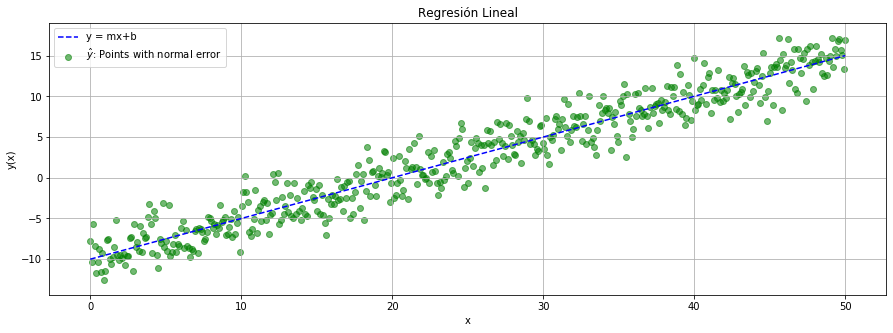

In [30]:
# Tamaño de Plot
plt.figure(figsize=(15, 5))

# Plots
plt.plot(x, y, "b--", label="y = mx+b");
plt.scatter(x, y_hat, c="g", alpha=0.55, label="$\hat{y}$: Points with normal error")

# Diseño
## Titulo
plt.title("Regresión Lineal")

## Nombres a los ejes
plt.ylabel("y(x)")
plt.xlabel("x")

## Mostrar una grid
plt.grid(True)

## Mostrar legenda
plt.legend()

## Mostrar el gráfico
plt.show();

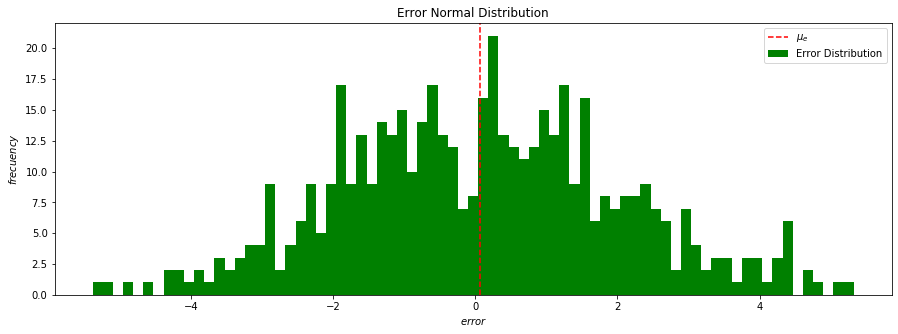

In [31]:
# Tamaño de Plot
plt.figure(figsize=(15, 5))

# Plots
plt.hist(e, bins=75, label="Error Distribution", color="green")
plt.axvline(mu_e, label="$\mu_e$", color="red", linestyle="--")

# Diseño
## Titulo
plt.title("Error Normal Distribution")

## Nombres a los ejes
plt.ylabel("$frecuency$")
plt.xlabel("$error$")

## Mostrar una grid
plt.grid(False)

## Mostrar legenda
plt.legend()

## Mostrar el gráfico
plt.show();

### APi de Pandas para graficar.

Pandas también incluye su propia interface para plotear **`plot`** la cual nos facilita la tarea de elegir los ejes, su documentación oficial [aqui](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html). 

 A continuación se mostrarán como crear diferentes tipos de plots utilizando Matplotlib, Seaborn y Pandas en conjunto. Para más ejemplos visita la [galería](https://seaborn.pydata.org/examples/index.html) de Seaborn.

A continuación, algunos ejemplos de estos.

#### Para el año 2016 ¿Cuáles son los top 10 de países de origen con más inmigrantes?

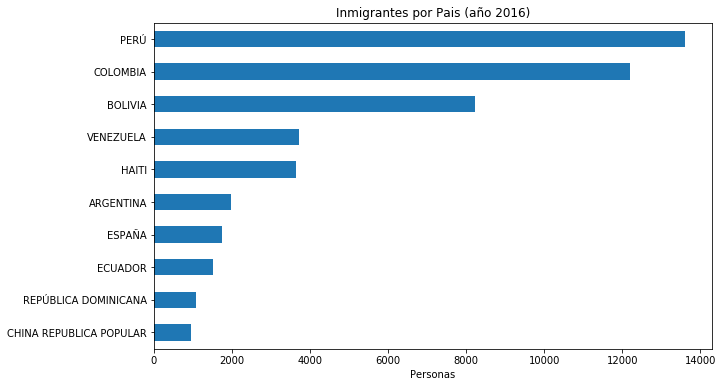

In [32]:
# Seleccion de datos
personas_por_pais = visas[visas["AÑO"] == 2016]["PAIS"].value_counts().head(10)

# Tamaño del plot
plt.figure(figsize=(10,6))
axis = plt.gca()

# Bar plot horizontal
personas_por_pais.plot.barh(ax=axis)

# Estilo
plt.title("Inmigrantes por Pais (año 2016)")
plt.xlabel("Personas")

# Invertir eje y (mostrar de mayor a menor)
axis.invert_yaxis()

plt.show();

#### ¿Cuál es la proporción se la columna `SEXO`?


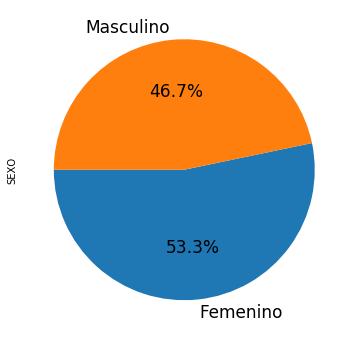

In [33]:
# Seleccion de datos
generos = visas["SEXO"].value_counts()

# Tamaño
plt.figure(figsize=(6,6))
axis = plt.gca()

# Pie Chart con porcentajes
generos.plot.pie(autopct='%1.1f%%', startangle=180, fontsize=17, ax=axis)

plt.show();

#### ¿Cómo se distribuye la edad según cada región?

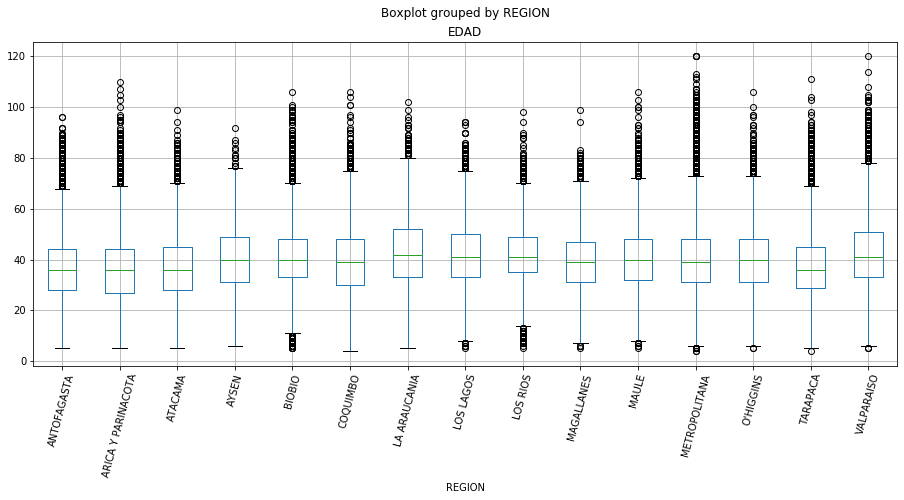

In [34]:
# Igual se puede reducir el código a una linea, incluyendo los parametros
# O agrupar datos en con el parámetros "by="
visas.boxplot(column=["EDAD"], by="REGION", figsize=(15,6), rot=75);

#### ¿Qué tendencias siguen la llegada de inmigrante de un país?

Atención con estas conversiones y el comando **`unstack`**

In [35]:
paises_de_interes = ["ESTADOS UNIDOS", "FRANCIA", "ALEMANIA", "CHINA REPUBLICA POPULAR", "ARGENTINA", "ESPAÑA"]

# df_ será un auxiliar para pasos intermedios

#  Paises de interes
df_ = visas[visas["PAIS"].isin(paises_de_interes)]

# Agrupar
df_group = df_.groupby("PAIS")

# Agregar
df_group_agg = df_group.agg({"AÑO":[("value_counts")]})

# Unstack
df_ = df_group_agg.unstack(level=-2, fill_value=0)
anual = df_["AÑO"]["value_counts"]
anual

PAIS,ALEMANIA,ARGENTINA,CHINA REPUBLICA POPULAR,ESPAÑA,ESTADOS UNIDOS,FRANCIA
AÑO,,,,,,
2005,144,1873,374,225,339,138
2006,130,1843,394,221,335,183
2007,191,1687,396,301,299,198
2008,183,1478,366,244,280,177
2009,201,1421,652,327,340,200
2010,181,1272,617,280,345,223
2011,166,1338,665,283,366,207
2012,233,1642,699,537,537,253
2013,165,1479,816,821,473,248


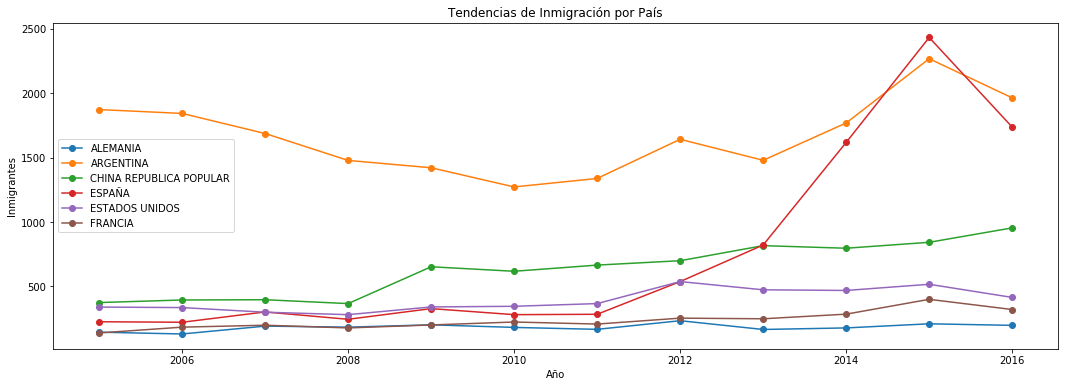

In [36]:
# Tamaño
plt.figure(figsize=(18,6))
axis = plt.gca()

# Pie Chart con porcentajes
anual.plot.line(ax=axis, marker="o")

# Estilo
plt.title("Tendencias de Inmigración por País")
plt.xlabel("Año")
plt.ylabel("Inmigrantes")
plt.legend();

<div id="1.3"></div>

# Caso de estudio: The Complete Pokemon Dataset

<img src="https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-cover.jpg" width="100%"></img>


[The Complete Pokemon Dataset](https://www.kaggle.com/rounakbanik/pokemon) es un conjunto de datos disponible en la plataforma [Kaggle](https://www.kaggle.com/). Este conjunto de datos contiene información sobre _Pokemones_ disponibles hasta la séptima generación.

Esta información abarca desde los nombres, generación, tipos y stats de los diferentes _Pokemones_, la cuál utilizaremos para analizar a las diferentes generaciones de pokemones.

In [38]:
dataset_path = "https://labcomp.cl/~sborquez/datasets/pokemon/pokemon.csv"

columns = ['pokedex_number', 'name', 'type1', 'type2', 'classfication', 'generation', 'is_legendary',
           'height_m', 'weight_kg', 'capture_rate', 'base_egg_steps', 'base_happiness',
           'attack','defense', 'experience_growth', 'hp',
           'sp_attack', 'sp_defense', 'speed']

pokedata = pd.read_csv(dataset_path)[columns]
pokedata.type2.fillna(value='None', inplace=True)
pokedata.is_legendary = pokedata.is_legendary.astype(bool)

In [39]:
pokedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pokedex_number     801 non-null    int64  
 1   name               801 non-null    object 
 2   type1              801 non-null    object 
 3   type2              801 non-null    object 
 4   classfication      801 non-null    object 
 5   generation         801 non-null    int64  
 6   is_legendary       801 non-null    bool   
 7   height_m           781 non-null    float64
 8   weight_kg          781 non-null    float64
 9   capture_rate       801 non-null    object 
 10  base_egg_steps     801 non-null    int64  
 11  base_happiness     801 non-null    int64  
 12  attack             801 non-null    int64  
 13  defense            801 non-null    int64  
 14  experience_growth  801 non-null    int64  
 15  hp                 801 non-null    int64  
 16  sp_attack          801 non

In [40]:
pokedata.sample(5)

,pokedex_number,name,type1,type2,classfication,generation,is_legendary,height_m,weight_kg,capture_rate,base_egg_steps,base_happiness,attack,defense,experience_growth,hp,sp_attack,sp_defense,speed
178,179,Mareep,electric,None,Wool Pokémon,2,False,0.6,7.8,235,5120,70,40,40,1059860,55,65,45,35
1,2,Ivysaur,grass,poison,Seed Pokémon,1,False,1.0,13.0,45,5120,70,62,63,1059860,60,80,80,60
418,419,Floatzel,water,None,Sea Weasel Pokémon,4,False,1.1,33.5,75,5120,70,105,55,1000000,85,85,50,115
428,429,Mismagius,ghost,None,Magical Pokémon,4,False,0.9,4.4,45,6400,35,60,60,800000,60,105,105,105
522,523,Zebstrika,electric,None,Thunderbolt Pokémon,5,False,1.6,79.5,75,5120,70,100,63,1000000,75,80,63,116


<div id="1.3.1"></div>

## Estadísticas Básicas

Lo especial de este dataset es que la mayoría de sus columnas son tipos numericos: `int64` y `float64`. Esto nos permite calcular las siguientes medidas.

In [41]:
# Minimo y Maximo
print("Estadísticos")
print(f"El Pokemon más pequeño mide {pokedata.height_m.min()} metros.")
print(f"El Pokemon más pesado pesa {pokedata.weight_kg.max()} kilogramos.")

# Mediana
print(f"La defensa media es de {pokedata.defense.median()}")

# Percentil
print(f"El percentil 95 de 'sp_attack' es de {np.percentile(pokedata.sp_attack, 95)}")

# Promedio o Media 
print(f"El ataque promedio es de  {pokedata.attack.mean():.3f}")

# Var y std
print(f"La varianza de el 'speed' es de {pokedata.speed.var():.3f}")
print(f"La desviación standard de el 'speed' es de {pokedata.speed.std():.3f}")

# Operaciones Aritméticas
print()
print("Operaciones Aritmeticas")
print(f"Un arca con una pareja de cada pokemones pesaría: {2*pokedata.weight_kg.sum():.2f} [kg]")

Estadísticos
El Pokemon más pequeño mide 0.1 metros.
El Pokemon más pesado pesa 999.9 kilogramos.
La defensa media es de 70.0
El percentil 95 de 'sp_attack' es de 131.0
El ataque promedio es de  77.858
La varianza de el 'speed' es de 835.653
La desviación standard de el 'speed' es de 28.908

Operaciones Aritmeticas
Un arca con una pareja de cada pokemones pesaría: 95872.60 [kg]


De todas formas, esto se puede hacer en una sola linea usando el método `df.describe()`

In [42]:
pokedata.describe()

,pokedex_number,generation,height_m,weight_kg,base_egg_steps,base_happiness,attack,defense,experience_growth,hp,sp_attack,sp_defense,speed
count,801.000000,801.000000,781.000000,781.000000,801.000000,801.000000,801.000000,801.000000,8.010000e+02,801.000000,801.000000,801.000000,801.000000
mean,401.000000,3.690387,1.163892,61.378105,7191.011236,65.362047,77.857678,73.008739,1.054996e+06,68.958801,71.305868,70.911361,66.334582
std,231.373075,1.930420,1.080326,109.354766,6558.220422,19.598948,32.158820,30.769159,1.602558e+05,26.576015,32.353826,27.942501,28.907662
min,1.000000,1.000000,0.100000,0.100000,1280.000000,0.000000,5.000000,5.000000,6.000000e+05,1.000000,10.000000,20.000000,5.000000
25%,201.000000,2.000000,0.600000,9.000000,5120.000000,70.000000,55.000000,50.000000,1.000000e+06,50.000000,45.000000,50.000000,45.000000
50%,401.000000,4.000000,1.000000,27.300000,5120.000000,70.000000,75.000000,70.000000,1.000000e+06,65.000000,65.000000,66.000000,65.000000
75%,601.000000,5.000000,1.500000,64.800000,6400.000000,70.000000,100.000000,90.000000,1.059860e+06,80.000000,91.000000,90.000000,85.000000
max,801.000000,7.000000,14.500000,999.900000,30720.000000,140.000000,185.000000,230.000000,1.640000e+06,255.000000,194.000000,230.000000,180.000000


<div id="1.3.2"></div>

## Operaciones y Comparaciones entre Columnas

### Comparar  distribucion entre dos Columnas

Quizás lo que nos interesa es saber como se distribuyen nuestros individuos pero en **dos variables**. Para esto existen las tablas de contigencia disponibles con el comando **`pd.crosstab(pd.Series, pd.Series)`**. Como argumento, recibe dos columnas (o también llamadas Series).

In [43]:
pd.crosstab(pokedata["is_legendary"], pokedata["generation"])

generation,1,2,3,4,5,6,7
is_legendary,,,,,,,
False,146,94,125,94,143,66,63
True,5,6,10,13,13,6,17


### Correlación

Podemos medir la correlación entre variables, para esto generaremos una nueva columna a partir de columnas existentes

In [44]:
pokedata["IMC"] = pokedata["weight_kg"]/np.power(2, pokedata["height_m"])
pokedata[["height_m", "weight_kg", "IMC", "speed"]].corr()

,height_m,weight_kg,IMC,speed
height_m,1.000000,0.626551,0.079338,0.202202
weight_kg,0.626551,1.000000,0.583799,0.051384
IMC,0.079338,0.583799,1.000000,-0.037963
speed,0.202202,0.051384,-0.037963,1.000000


### Agrupar en Bins

In [45]:
# Creamos una columna con los bins
pokedata["hp_bin"] = pd.cut(pokedata.hp, bins=4)

# Agrupamos usando esta columna y luego cualquer agg
pokedata.groupby("hp_bin")[["attack", "defense"]].mean()

,attack,defense
hp_bin,,
"(0.746, 64.5]",60.591281,62.302452
"(64.5, 128.0]",92.766265,82.934940
"(128.0, 191.5]",94.200000,67.200000
"(191.5, 255.0]",54.000000,47.250000


<div id="1.3.3"></div>

## Visualización Estadística de Datos


`Seaborn` agrega más funcionalidades a `matplotlib`, fácilidades para crear **plots estadísticos** y **mejoras visuales**. 

In [46]:
# Modulos para visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

### HeatMap

Más en este [link](https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap)

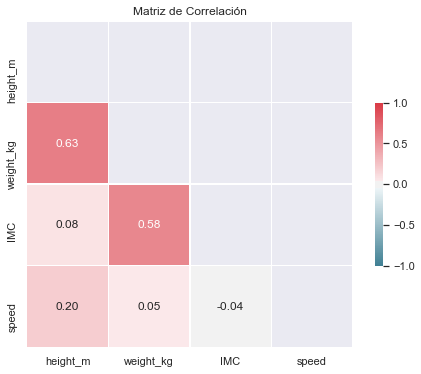

In [47]:
# Calcular la Correlación the correlation matrix
corr = pokedata[["height_m", "weight_kg", "IMC", "speed"]].corr()

# Generar una mask para solo mostrar un matriz triangular
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Figure
plt.subplots(figsize=(8, 6))
axis=plt.gca()
plt.title("Matriz de Correlación")

# Paleta de color
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Dibujar Heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            annot=True, fmt=".2f",  ax=axis,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

### Violin Plot


Más en este [link](https://seaborn.pydata.org/generated/seaborn.violinplot.html)


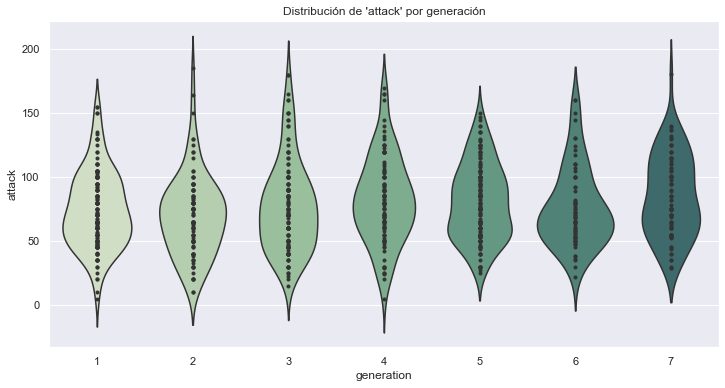

In [48]:
# Estilo
plt.figure(figsize=(12,6))
axis = plt.gca()
plt.title("Distribución de 'attack' por generación")

# paleta de colores
pal = sns.cubehelix_palette(8, rot=-.5, dark=.3)

# Show each distribution with both violins and points
sns.violinplot(x="generation", y="attack", data=pokedata, palette=pal, inner="points", ax=axis)

plt.show();

### Pair Plots

Más en este [link](https://seaborn.pydata.org/examples/scatterplot_matrix.html)

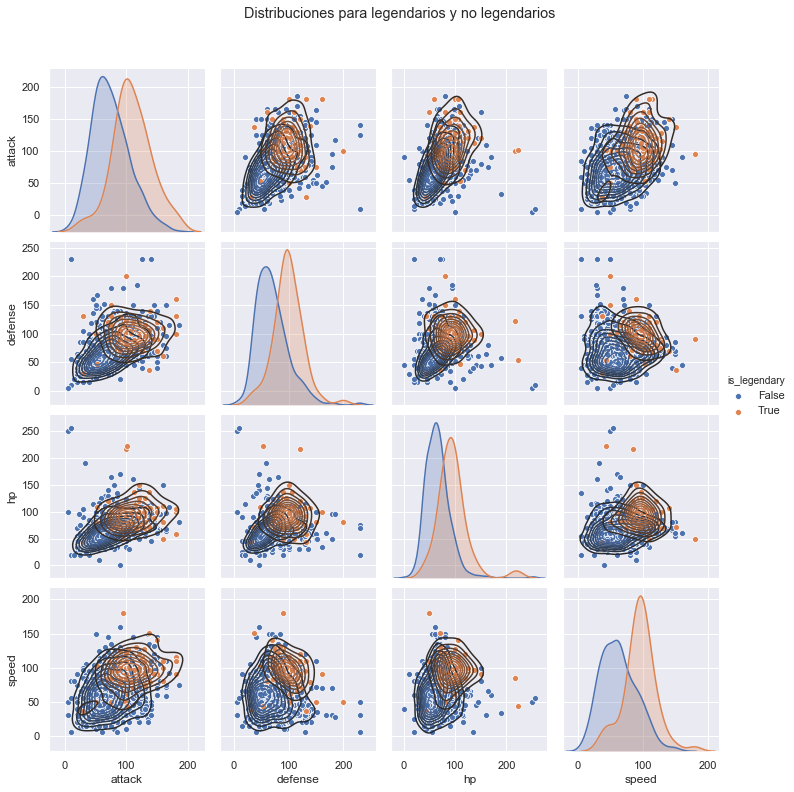

In [49]:
df_=pokedata[["is_legendary", "attack", "defense", "hp","speed"]]

g = sns.pairplot(df_, hue="is_legendary")
g.map_lower(sns.kdeplot)
g.map_upper(sns.kdeplot)
g.fig.suptitle("Distribuciones para legendarios y no legendarios", y=1.08)
plt.show();

### Swarm Plot

Más en este [link](https://seaborn.pydata.org/generated/seaborn.swarmplot.html)

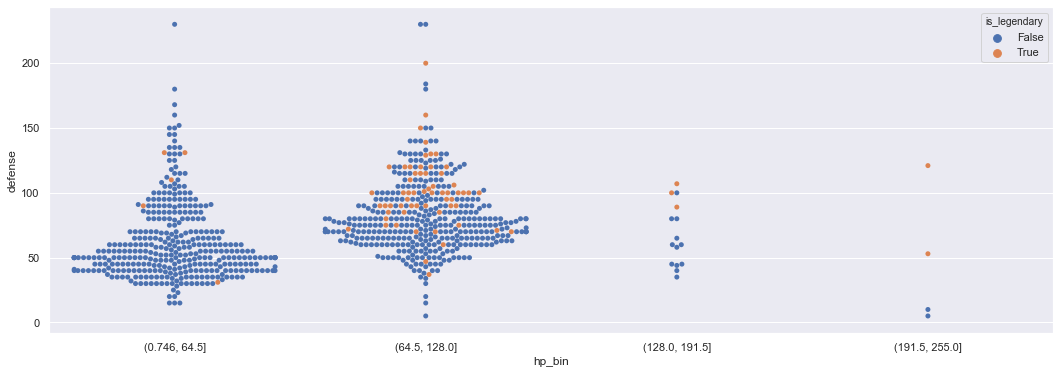

In [51]:
plt.figure(figsize=(18,6))
axis=plt.gca()
sns.swarmplot(hue="is_legendary", y="defense", x="hp_bin", data=pokedata, ax=axis);

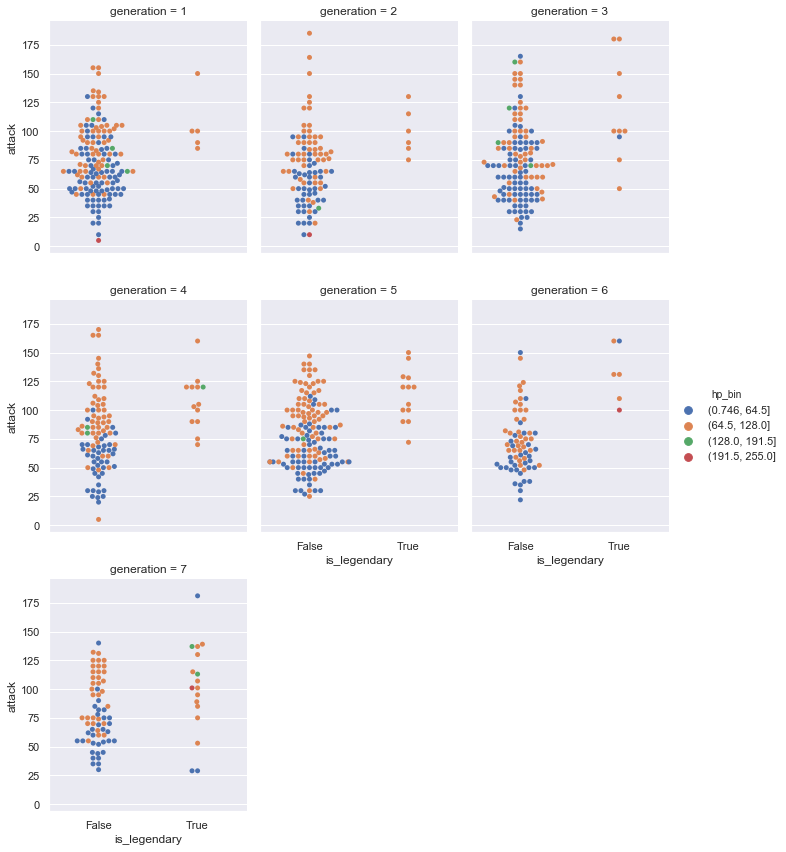

In [52]:
g = sns.catplot(col="generation", y="attack",
                x="is_legendary", hue="hp_bin",
                data=pokedata, kind="swarm", col_wrap=3,
                height=4, aspect=0.8);

### Join Plot, Marginal Distribution

Más info en este [link](https://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot)

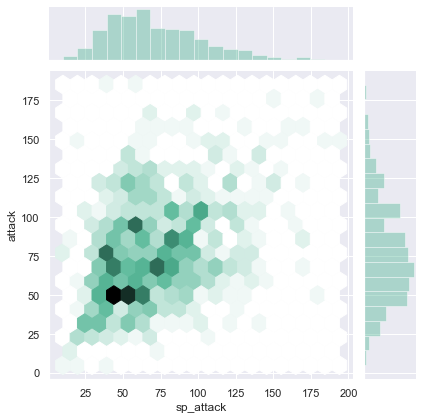

In [53]:
sns.jointplot(x="sp_attack", y="attack", kind="hex", color="#4CB391", data=pokedata);

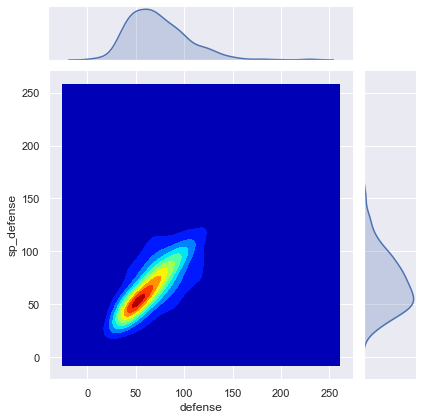

In [54]:
sns.jointplot(x="defense", y="sp_defense", kind="kde", cmap="jet", data=pokedata);

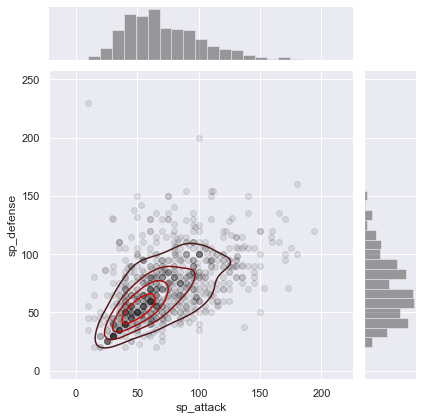

In [55]:
sns.jointplot("sp_attack", "sp_defense", data=pokedata, color="k", alpha=0.1).plot_joint(sns.kdeplot, zorder=1, n_levels=4, color="red")

<div id="1.4"></div>

# Caso de estudio: SARS-CoV-2 Total Cases Dataset


<img src="https://i.ytimg.com/vi/Kas0tIxDvrg/hqdefault.jpg" width="60%"></img>

Para esta sección, utilizaremos una versión del dataset disponible en [Coronavirus Source Data](https://ourworldindata.org/coronavirus-source-data). Esta se encontrará disponible en este [link](https://labcomp.cl/~sborquez/datasets/covid) ```The last update was made on April 16, 2020 (11:30, London time)```.